In [3]:
!pip install citipy

In [4]:
from citipy import citipy

In [5]:
# Import the random module.
import random

In [6]:
# Import the NumPy module.
import numpy as np

In [7]:
# Import timeit.
import timeit

In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1
latitudes

[-16.062510822192923,
 32.51379400552623,
 -51.18036668049998,
 72.56079351335865,
 88.45158162624271,
 -64.42856540934018,
 89.11048123969186,
 -35.07640314827872,
 -69.36364759428697,
 -15.637245979497605]

In [10]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500. 
%timeit latitudes(1500)

1.91 ms ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [14]:
import requests
requests.__version__

'2.23.0'

In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Initialize an Empty List and Counters

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Import the API key.
from config import weather_api_key

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0657726beb3fde855a8d109b55646a1c


# Loop Through the List of Cities and Build the City URL

In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | udachnyy
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | gamba
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | kuche
City not found. Skipping...
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | cap malheureux
Processing Record 11 of Set 1 | boddam
Processing Record 12 of Set 1 | pangnirtung
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | rungata
City not found. Skipping...
Processing Record 16 of Set 1 | lasa
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | kargopol
Processing Record 19 of Set 1 | keuruu
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | kununurra
Processing Record 22 of Set 1 | san juan
Processing Record 23 of Set 1 | belmonte
Processing Recor

Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | arkhangelsk
Processing Record 41 of Set 4 | parry sound
Processing Record 42 of Set 4 | lavrentiya
Processing Record 43 of Set 4 | menongue
Processing Record 44 of Set 4 | sterling
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | saint-francois
Processing Record 47 of Set 4 | tulun
Processing Record 48 of Set 4 | chabahar
Processing Record 49 of Set 4 | havoysund
Processing Record 50 of Set 4 | saint-louis
Processing Record 1 of Set 5 | kalmunai
Processing Record 2 of Set 5 | yanan
City not found. Skipping...
Processing Record 3 of Set 5 | chiang khong
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | cayenne
Processing Record 7 of Set 5 | matara
Processing Record 8 of Set 5 | saint anthony
Processing Record 9 of Set 5 | port hardy
Processing Record 10 of Set 5 | belushya guba
City not found. Sk

Processing Record 28 of Set 8 | monterey
Processing Record 29 of Set 8 | eldikan
City not found. Skipping...
Processing Record 30 of Set 8 | poum
Processing Record 31 of Set 8 | nemuro
Processing Record 32 of Set 8 | carros
Processing Record 33 of Set 8 | sur
Processing Record 34 of Set 8 | nador
Processing Record 35 of Set 8 | cehegin
Processing Record 36 of Set 8 | ibra
Processing Record 37 of Set 8 | kalinovskoye
Processing Record 38 of Set 8 | bonthe
Processing Record 39 of Set 8 | naron
Processing Record 40 of Set 8 | puerto escondido
Processing Record 41 of Set 8 | santa isabel
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | solnechnyy
Processing Record 44 of Set 8 | balaci
Processing Record 45 of Set 8 | kambove
Processing Record 46 of Set 8 | ca mau
Processing Record 47 of Set 8 | thunder bay
Processing Record 48 of Set 8 | coahuayana
Processing Record 49 of Set 8 | chikmagalur
Processing Record 50 of Set 8 | macae
Processing Record 1 of Set 9 | northam

Processing Record 18 of Set 12 | tilichiki
Processing Record 19 of Set 12 | santiago del estero
Processing Record 20 of Set 12 | marystown
Processing Record 21 of Set 12 | barawe
City not found. Skipping...
Processing Record 22 of Set 12 | newport
Processing Record 23 of Set 12 | nurota
Processing Record 24 of Set 12 | yangjiang
Processing Record 25 of Set 12 | rundu
Processing Record 26 of Set 12 | kruisfontein
Processing Record 27 of Set 12 | nelson bay
Processing Record 28 of Set 12 | polunochnoye
Processing Record 29 of Set 12 | the valley
Processing Record 30 of Set 12 | sebinkarahisar
Processing Record 31 of Set 12 | mitu
Processing Record 32 of Set 12 | binzhou
Processing Record 33 of Set 12 | sakakah
Processing Record 34 of Set 12 | palermo
Processing Record 35 of Set 12 | aswan
Processing Record 36 of Set 12 | lakes entrance
Processing Record 37 of Set 12 | manoel urbano
Processing Record 38 of Set 12 | elizabeth city
Processing Record 39 of Set 12 | osakarovka
Processing Reco

In [20]:
len(city_data)

564

# Convert the array of dictionaries to a Pandas DataFrame.

In [21]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Udachnyy,66.42,112.40,57.20,44,75,6.71,RU,2020-06-17 02:19:39
1,Kapaa,22.08,-159.32,82.40,65,20,16.11,US,2020-06-17 02:19:40
2,Pisco,-13.70,-76.22,62.60,82,2,6.93,PE,2020-06-17 02:19:40
3,Chuy,-33.70,-53.46,60.93,95,82,7.83,UY,2020-06-17 02:19:40
4,Gamba,-2.65,10.00,73.06,92,100,6.62,GA,2020-06-17 02:19:41
5,Qaqortoq,60.72,-46.03,39.20,93,1,6.93,GL,2020-06-17 02:19:41
6,Ribeira Grande,38.52,-28.70,64.81,89,65,19.69,PT,2020-06-17 02:19:42
7,Faanui,-16.48,-151.75,79.79,78,96,2.35,PF,2020-06-17 02:19:42
8,Cap Malheureux,-19.98,57.61,66.99,85,8,8.01,MU,2020-06-17 02:19:43
9,Boddam,57.47,-1.78,54.00,93,75,2.24,GB,2020-06-17 02:19:44


In [22]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Udachnyy,RU,2020-06-17 02:19:39,66.42,112.40,57.20,44,75,6.71
1,Kapaa,US,2020-06-17 02:19:40,22.08,-159.32,82.40,65,20,16.11
2,Pisco,PE,2020-06-17 02:19:40,-13.70,-76.22,62.60,82,2,6.93
3,Chuy,UY,2020-06-17 02:19:40,-33.70,-53.46,60.93,95,82,7.83
4,Gamba,GA,2020-06-17 02:19:41,-2.65,10.00,73.06,92,100,6.62
5,Qaqortoq,GL,2020-06-17 02:19:41,60.72,-46.03,39.20,93,1,6.93
6,Ribeira Grande,PT,2020-06-17 02:19:42,38.52,-28.70,64.81,89,65,19.69
7,Faanui,PF,2020-06-17 02:19:42,-16.48,-151.75,79.79,78,96,2.35
8,Cap Malheureux,MU,2020-06-17 02:19:43,-19.98,57.61,66.99,85,8,8.01
9,Boddam,GB,2020-06-17 02:19:44,57.47,-1.78,54.00,93,75,2.24


# Create the output file (CSV).

In [23]:
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592360607.810727

# Build the scatter plot for latitude vs. max temperature.

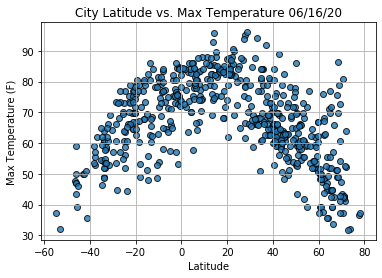

In [26]:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# Build the scatter plots for latitude vs. humidity.

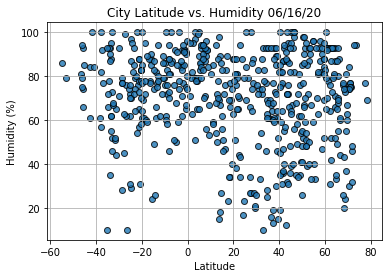

In [27]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Build the scatter plots for latitude vs. cloudiness.

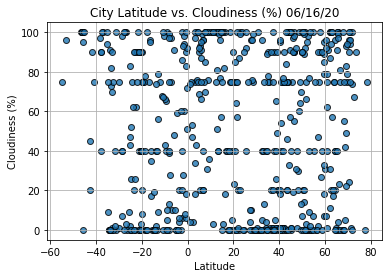

In [28]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Build the scatter plots for latitude vs. wind speed.

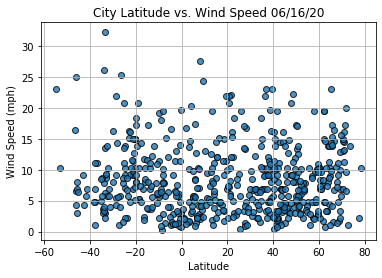

In [29]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a Linear Regression Function

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Udachnyy,RU,2020-06-17 02:19:39,66.42,112.40,57.20,44,75,6.71
1,Kapaa,US,2020-06-17 02:19:40,22.08,-159.32,82.40,65,20,16.11
5,Qaqortoq,GL,2020-06-17 02:19:41,60.72,-46.03,39.20,93,1,6.93
6,Ribeira Grande,PT,2020-06-17 02:19:42,38.52,-28.70,64.81,89,65,19.69
9,Boddam,GB,2020-06-17 02:19:44,57.47,-1.78,54.00,93,75,2.24
...,...,...,...,...,...,...,...,...,...
558,Gravdal,NO,2020-06-17 02:23:25,68.12,13.50,51.12,74,0,7.25
560,Leh,IN,2020-06-17 02:23:26,34.17,77.58,51.03,46,4,6.38
561,Praia Da Vitoria,PT,2020-06-17 02:23:26,38.73,-27.07,62.60,93,40,10.98
562,Louth,GB,2020-06-17 02:23:27,53.37,0.00,55.40,93,2,6.93


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

In [58]:
  def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

# Create Northern and Southern Hemisphere DataFrames.

In [59]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere

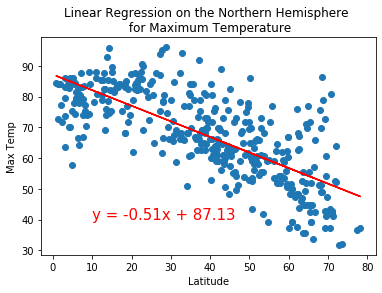

In [60]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

# Linear regression on the Southern Hemisphere

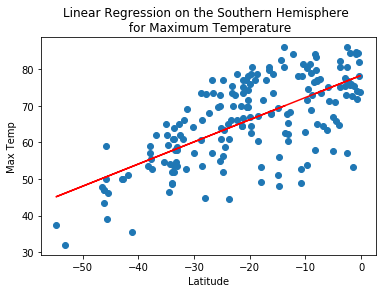

In [61]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

# Linear regression on the Northern Hemisphere

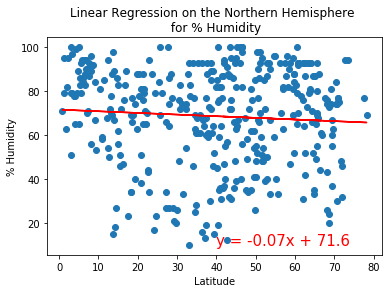

In [55]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

# Linear regression on the Southern Hemisphere

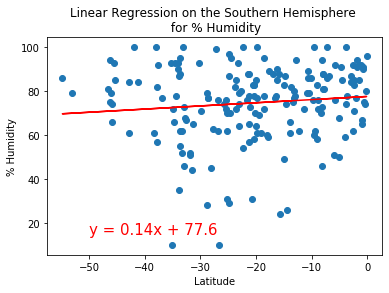

In [57]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

# Linear regression on the Northern Hemisphere

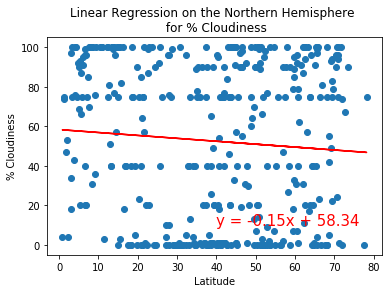

In [62]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

# Linear regression on the Southern Hemisphere

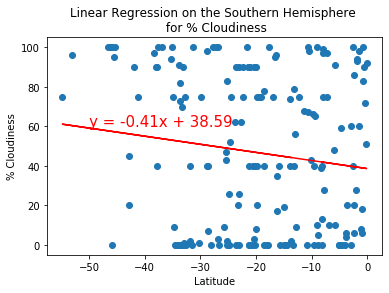

In [64]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

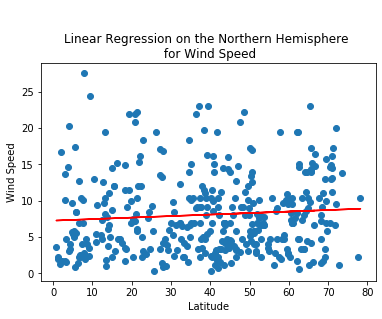

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

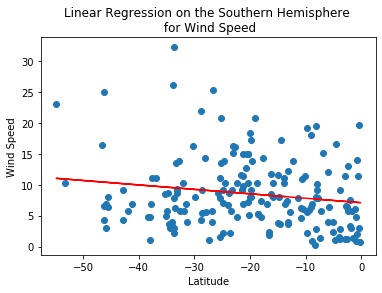

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))